Script used to create the necessary graphical and analytical tools that will allow to study the distribution of the returns obtained from the different portfolios generated.

https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/#:~:text=Using%20Probability%20Plots%20to%20Identify,is%20simple%20to%20do%20visually.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest
import os

# Load the dataset

In [2]:
path = os.path.join("data", 'portfolio_metrics.csv')
return_df = pd.read_csv(path, sep=',')
return_df = return_df.drop('Unnamed: 0', axis=1)
return_df.head()

,ST,CB,PB,GO,CA,RETURN,VOLATILITY
0,1.0,0.0,0.0,0.0,0.0,5.133871,4.034096
1,0.8,0.2,0.0,0.0,0.0,5.023717,4.078597
2,0.8,0.0,0.2,0.0,0.0,3.927727,3.839026
3,0.8,0.0,0.0,0.2,0.0,8.063449,3.530446
4,0.8,0.0,0.0,0.0,0.2,3.830809,3.557606


# Raw data histogram

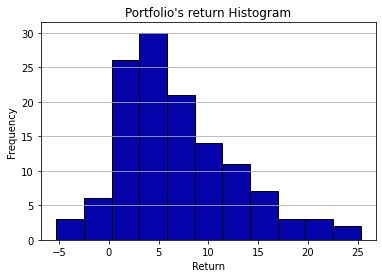

In [3]:
n, bins, patches = plt.hist(x=return_df['RETURN'], bins='auto', color='#0504aa', align='right', edgecolor='black')
plt.grid(axis='y')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title("Portfolio's return Histogram")
maxfreq = n.max()
#plt.yticks(np.arange(0, 4, 1))
plt.show()

# Distribution plot

<AxesSubplot:ylabel='Density'>

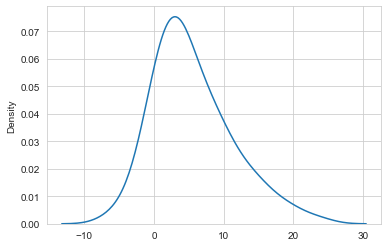

In [4]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(return_df['RETURN']))

# Probability plot

<AxesSubplot:xlabel='Return', ylabel='Probability'>

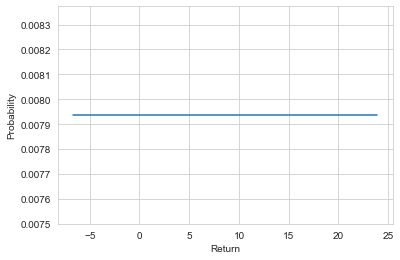

In [5]:
return_df_probs = return_df.groupby('RETURN').size().div(len(return_df))
return_df_probs.plot(xlabel='Return', ylabel='Probability')

# Box plot

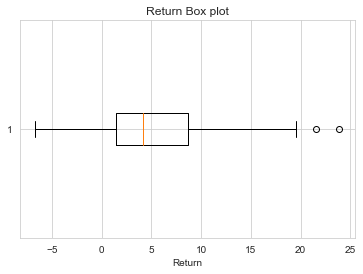

In [6]:
plt.boxplot(return_df['RETURN'], vert=False)
plt.title('Return Box plot')
plt.xlabel('Return')
plt.show()

# Distribution test: normaltest

In [7]:
stat, p_val = normaltest(return_df['RETURN'])
print(f'Normaltest p-value: {p_val}')

Normaltest p-value: 0.001813401642881021
